<a href="https://colab.research.google.com/github/a-nagar/cs4372/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# read the titanic dataset from https://raw.githubusercontent.com/a-nagar/cs4372/main/data/titanic.csv
import pandas as pd
titanic = pd.read_csv("https://raw.githubusercontent.com/a-nagar/cs4372/main/data/titanic.csv")

In [54]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
# find the number of distinct pclass values and count of those values
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [56]:
# print the row index and column names
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [57]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
# Find average fare for class = 1, you may need to convert the data to float
titanic[titanic['Pclass'] == 1]['Fare'].astype('float').mean()

84.1546875

In [61]:
# sort the data for pclass = 1 by age. Get rid of age = ? data
pclass1 = titanic[(titanic['Pclass'] == 1) & (titanic['Age']!="?")]
pclass1.sort_values("Age", ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
...,...,...,...,...,...,...,...,...,...,...,...,...
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C


<Axes: ylabel='Frequency'>

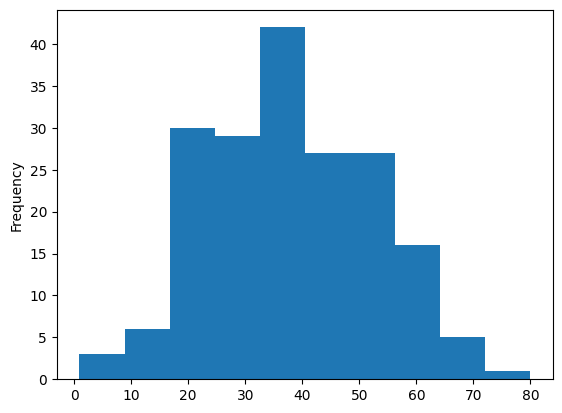

In [62]:
# create a histogram of pclass1 data
import seaborn as sns
import numpy as np

pclass1['Age'].astype("float").plot.hist(bins = 10)

In [65]:
# Find out how many male and females survived by grouping on the sex column
titanic[titanic['Survived'] == 1].groupby('Sex').count()['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

In [68]:
# Find average age of those who survived and those that didn't survive
titanic.groupby(['Sex', 'Survived']).mean(numeric_only = True)['Age']

Sex     Survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: Age, dtype: float64

In [69]:
# read the airlines delay dataset
url = "https://an-utd-python.s3-us-west-1.amazonaws.com/flights.csv"
flights = pd.read_csv(url)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,15.0,205,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,14.0,280,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,34.0,286,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,30.0,285,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,35.0,235,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


In [ ]:
# Find the top 5 airlines with highest delay and lowest delay

In [ ]:
# understand the pivot_table function of pandas